In [232]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import preprocess, plotutils


In [233]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [234]:
df = pd.read_csv("data\olid-training-v1.0.tsv", sep="\t")

In [235]:
def compute_label(a, b, c):
    if a == 'NOT':
        return a
    elif b == 'UNT':
        return b
    else:
        return c

In [236]:
df['label'] = df.apply(lambda x: compute_label(x.subtask_a, x.subtask_b, x.subtask_c), axis=1)

In [237]:
count = df.groupby('label').size().to_dict()

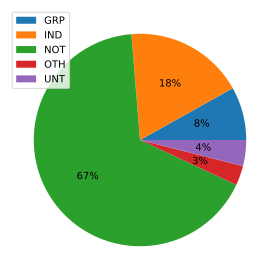

In [238]:
plt.pie(x=count.values(), autopct='%.0f%%')
plt.legend(count.keys())
plt.savefig("1.pdf", bbox_inches='tight')
plt.show()

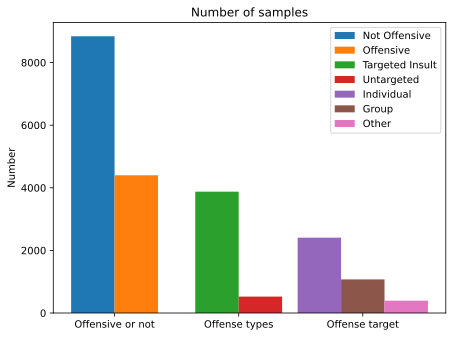

In [239]:
sub_a_labels = df['subtask_a'].value_counts().to_dict()
sub_b_labels = df['subtask_b'].value_counts().to_dict()
sub_c_labels = df['subtask_c'].value_counts().to_dict()

plotutils.plot_data_sample_bar_chart(sub_a_labels, sub_b_labels, sub_c_labels)


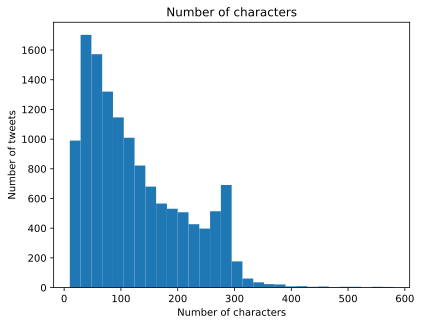

In [240]:
len_tweets = [len(tweet) for tweet in df["tweet"].tolist()]
plt.hist(len_tweets, bins=30)
plt.title('Number of characters')
plt.xlabel('Number of characters')
plt.ylabel('Number of tweets')
plt.savefig("num_char.svg", bbox_inches='tight')
plt.show()

In [241]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
#tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, match_phone_numbers=False)
#docs = [tweet_tokenizer.tokenize(tweet) for tweet in df.tweet]

In [242]:
from spacy.lang.en import stop_words
from string import punctuation
import emoji

In [243]:
stop_words = stop_words.STOP_WORDS
stop_words = stop_words.union(set(emoji.get_emoji_unicode_dict('en').values()))
stop_words.add("URL")
stop_words.add("url")
stop_words = stop_words.union(set(punctuation))

In [244]:
def tweet_tokenization(doc):
    tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, match_phone_numbers=False)
    tweet_tokenize = [tweet_tokenizer.tokenize(tweet) for tweet in doc]
    return tweet_tokenize


In [245]:
def stop_word_removal(doc, stop_words):
    new_tweets = []
    for t in doc:
        new_words = []
        for word in t:
            if word not in stop_words:
                new_words.append(word)
        new_tweets.append(new_words)

    return new_tweets

    #docs = [[word for word in doc if word not in stop_words] for doc in tweet_tokenize]

In [246]:
def hashtag_removal(doc):
    new_docs = []
    for t in doc:
        new_doc=[]
        for word in t:
            if word[0] == "#":
                new_doc.append(word[1:])
            else:
                new_doc.append(word)
        new_docs.append(new_doc)
    
    return new_docs

In [247]:
tweet_tokenization = tweet_tokenization(df["tweet"])
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)

In [248]:
from wordcloud import WordCloud

In [249]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(210, 100%, 24%)"

In [250]:
def draw_wordcloud(tweet_remove):
    text = " ".join([word for doc in tweet_remove for word in doc])
    wordcloud = WordCloud(background_color='white', color_func=color_func, width=1600, height=800).generate(text)

    # Display the generated image:
    plt.figure( figsize=(20, 10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("cloud_TIN.svg", bbox_inches='tight')
    plt.show()
    

In [251]:
len_tweets = [len(tweet) for tweet in tweet_remove]
plt.hist(len_tweets, bins=30)
plt.title('Number of tokens')
plt.xlabel('Number of tokens')
plt.ylabel('Number of tweets')
plt.savefig("num_token.svg", bbox_inches='tight')
plt.show()

In [252]:
draw_wordcloud(tweet_remove)

Not Offensive

In [253]:
# not_offensive = df[df["subtask_a"] == "NOT"]["tweet"]
# print(not_offensive)
a = df[df["subtask_a"] == "NOT"]
b = a["tweet"]
tweet_tokenization = tweet_tokenization(b)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

Offensive

In [254]:
offensive = df[df["subtask_a"] == "OFF"]["tweet"]
tweet_tokenization = tweet_tokenization(offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

Targeted Offensive

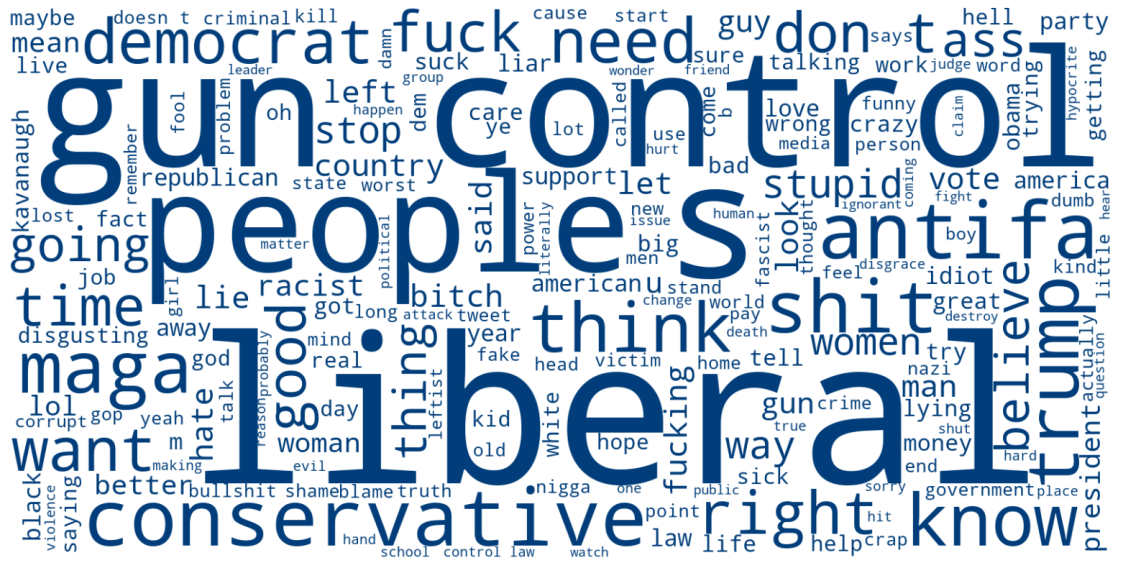

In [255]:
targeted_offensive = df[df["subtask_b"] == "TIN"]["tweet"]
tweet_tokenization = tweet_tokenization(targeted_offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

Individual Offensive

In [256]:
individual_offensive = df[df["subtask_c"] == "IND"]["tweet"]
tweet_tokenization = tweet_tokenization(individual_offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

TypeError: 'list' object is not callable

Group Offensive

In [ ]:
group_offensive = df[df["subtask_c"] == "GRP"]["tweet"]
tweet_tokenization = tweet_tokenization(group_offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

In [ ]:
group_offensive = df[df["subtask_c"] == "OTH"]["tweet"]
tweet_tokenization = tweet_tokenization(group_offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)